In [1]:
import matplotlib.pyplot as plt

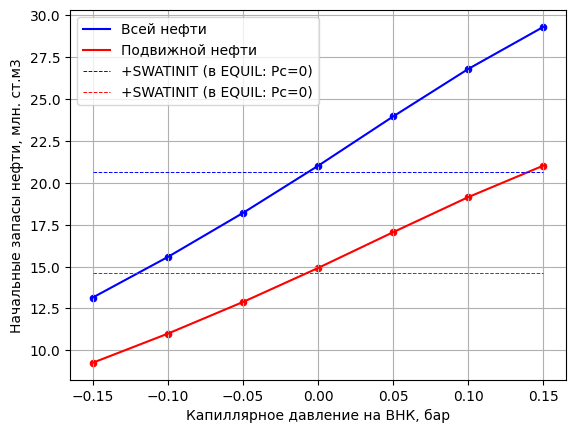

In [2]:
p_c = [-0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15]
sum_oil = [13.14605, 15.5679, 18.1933, 21.0043, 23.9502, 26.7845, 29.2950]
mob_oil = [9.2591, 10.9966, 12.8832, 14.9129, 17.0494, 19.1419, 21.0213]

swat_init_sum = [20.6446] * len(p_c)
swat_init_mob = [14.6002] * len(p_c)

plt.plot(p_c, sum_oil, label='Всей нефти', color='blue')
plt.scatter(p_c, sum_oil, color='blue', s=20)
plt.plot(p_c, mob_oil, label='Подвижной нефти', color='red')
plt.scatter(p_c, mob_oil, color='red', s=20)
plt.plot(p_c, swat_init_sum, '--', label='+SWATINIT (в EQUIL: Pc=0)', color='blue', linewidth=0.7)
plt.plot(p_c, swat_init_mob, '--', label='+SWATINIT (в EQUIL: Pc=0)', color='red', linewidth=0.7)
plt.xlabel('Капиллярное давление на ВНК, бар')
plt.ylabel('Начальные запасы нефти, млн. ст.м3')
plt.legend()
plt.grid()

In [15]:
def kruskal(
    num_nodes: int, edges: list[tuple[int, int, int]]
) -> list[tuple[int, int, int]]:
    """
    >>> kruskal(4, [(0, 1, 3), (1, 2, 5), (2, 3, 1)])
    [(2, 3, 1), (0, 1, 3), (1, 2, 5)]
    >>> kruskal(4, [(0, 1, 3), (1, 2, 5), (2, 3, 1), (0, 2, 1), (0, 3, 2)])
    [(2, 3, 1), (0, 2, 1), (0, 1, 3)]
    >>> kruskal(4, [(0, 1, 3), (1, 2, 5), (2, 3, 1), (0, 2, 1), (0, 3, 2),
    ... (2, 1, 1)])
    [(2, 3, 1), (0, 2, 1), (2, 1, 1)]
    """
    edges = sorted(edges, key=lambda edge: edge[2])

    parent = list(range(num_nodes))

    def find_parent(i):
        if i != parent[i]:
            parent[i] = find_parent(parent[i])
        return parent[i]

    minimum_spanning_tree_cost = 0
    minimum_spanning_tree = []

    for edge in edges:
        parent_a = find_parent(edge[0])
        parent_b = find_parent(edge[1])
        if parent_a != parent_b:
            minimum_spanning_tree_cost += edge[2]
            minimum_spanning_tree.append(edge)
            parent[parent_a] = parent_b

    return minimum_spanning_tree


In [16]:
kruskal(4, [(0, 1, 3), (1, 2, 5), (2, 3, 1)])

[(2, 3, 1), (0, 1, 3), (1, 2, 5)]

In [18]:
save_kruskal = kruskal(
    15,
    [(0, 5, 2), (0, 4, 6), (0, 1, 8), (4, 5, 5), (5, 11, 6), (5, 10, 4), (5, 6, 3), (4, 10, 8), (6, 10, 4), (4, 6, 7),
    (3, 4, 3), (1, 7, 5), (3, 6, 4), (1, 3, 4), (1, 2, 1), (2, 3, 9), (2, 8, 3), (3, 8, 2), (6, 7, 1), (7, 8, 5),
    (8, 9, 3), (7, 9, 3), (6, 9, 2), (6, 13, 9), (10, 14, 7), (11, 14, 3), (9, 11, 6), (10, 13, 6), (9, 14, 3),
    (13, 14, 2), (9, 13, 5), (7, 12, 4), (8, 12, 6), (12, 13, 4)]
)
save_kruskal

[(1, 2, 1),
 (6, 7, 1),
 (0, 5, 2),
 (3, 8, 2),
 (6, 9, 2),
 (13, 14, 2),
 (5, 6, 3),
 (3, 4, 3),
 (2, 8, 3),
 (8, 9, 3),
 (11, 14, 3),
 (9, 14, 3),
 (5, 10, 4),
 (7, 12, 4)]

In [20]:
[(i+1, j+1, k) for (i, j, k) in save_kruskal]

[(2, 3, 1),
 (7, 8, 1),
 (1, 6, 2),
 (4, 9, 2),
 (7, 10, 2),
 (14, 15, 2),
 (6, 7, 3),
 (4, 5, 3),
 (3, 9, 3),
 (9, 10, 3),
 (12, 15, 3),
 (10, 15, 3),
 (6, 11, 4),
 (8, 13, 4)]

In [22]:
from urllib.parse import quote
initial_link = 'https://disk.yandex.ru/d/HeQUisnwV0K5EQ/Второй%20курс%20магистратуры/Гидродинамическое%20моделирование/2022_09_21_ГДМ_практика2.mp4'
initial_link = initial_link.replace('%20', ' ')
encoded_link = quote(initial_link)
encoded_link = encoded_link.replace('%', '\%')
encoded_link = encoded_link.replace('https\%3A','https:')
print(encoded_link)

https://disk.yandex.ru/d/HeQUisnwV0K5EQ/\%D0\%92\%D1\%82\%D0\%BE\%D1\%80\%D0\%BE\%D0\%B9\%20\%D0\%BA\%D1\%83\%D1\%80\%D1\%81\%20\%D0\%BC\%D0\%B0\%D0\%B3\%D0\%B8\%D1\%81\%D1\%82\%D1\%80\%D0\%B0\%D1\%82\%D1\%83\%D1\%80\%D1\%8B/\%D0\%93\%D0\%B8\%D0\%B4\%D1\%80\%D0\%BE\%D0\%B4\%D0\%B8\%D0\%BD\%D0\%B0\%D0\%BC\%D0\%B8\%D1\%87\%D0\%B5\%D1\%81\%D0\%BA\%D0\%BE\%D0\%B5\%20\%D0\%BC\%D0\%BE\%D0\%B4\%D0\%B5\%D0\%BB\%D0\%B8\%D1\%80\%D0\%BE\%D0\%B2\%D0\%B0\%D0\%BD\%D0\%B8\%D0\%B5/2022_09_21_\%D0\%93\%D0\%94\%D0\%9C_\%D0\%BF\%D1\%80\%D0\%B0\%D0\%BA\%D1\%82\%D0\%B8\%D0\%BA\%D0\%B02.mp4


In [23]:
initial_link = 'https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FWicxck3PRHBvGgXBKaNry%2FRtiluR1m6cR6Bi14xdyyNQDBM0D9VXsHr3EpLffWemDqZvSgIch5AN9ddz7ydViQ%3D%3D%3A%2FВторой%20курс%20магистратуры%2FГидродинамическое%20моделирование%2FЗадания%2FНевное_решение_уравнения_фильтрации.pdf&name=Невное_решение_уравнения_фильтрации.pdf'
encoded_link = initial_link.replace('%', '%')
print('Исходная ссылка:')
print(encoded_link)
encoded_link = encoded_link.replace('Второй', quote('Второй'))
encoded_link = encoded_link.replace('курс', quote('курс'))
encoded_link = encoded_link.replace('магистратуры', quote('магистратуры'))
encoded_link = encoded_link.replace('Гидродинамическое', quote('Гидродинамическое'))
encoded_link = encoded_link.replace('моделирование', quote('моделирование'))
encoded_link = encoded_link.replace('Задания', quote('Задания'))
encoded_link = encoded_link.replace('Невное_решение_уравнения_фильтрации', quote('Невное_решение_уравнения_фильтрации'))
encoded_link = encoded_link.replace('%', '\%')
print('Закодированная ссылка для XeLaTeX:')
print(encoded_link)

Исходная ссылка:
https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FWicxck3PRHBvGgXBKaNry%2FRtiluR1m6cR6Bi14xdyyNQDBM0D9VXsHr3EpLffWemDqZvSgIch5AN9ddz7ydViQ%3D%3D%3A%2FВторой%20курс%20магистратуры%2FГидродинамическое%20моделирование%2FЗадания%2FНевное_решение_уравнения_фильтрации.pdf&name=Невное_решение_уравнения_фильтрации.pdf
Закодированная ссылка для XeLaTeX:
https://docs.yandex.ru/docs/view?url=ya-disk-public\%3A\%2F\%2FWicxck3PRHBvGgXBKaNry\%2FRtiluR1m6cR6Bi14xdyyNQDBM0D9VXsHr3EpLffWemDqZvSgIch5AN9ddz7ydViQ\%3D\%3D\%3A\%2F\%D0\%92\%D1\%82\%D0\%BE\%D1\%80\%D0\%BE\%D0\%B9\%20\%D0\%BA\%D1\%83\%D1\%80\%D1\%81\%20\%D0\%BC\%D0\%B0\%D0\%B3\%D0\%B8\%D1\%81\%D1\%82\%D1\%80\%D0\%B0\%D1\%82\%D1\%83\%D1\%80\%D1\%8B\%2F\%D0\%93\%D0\%B8\%D0\%B4\%D1\%80\%D0\%BE\%D0\%B4\%D0\%B8\%D0\%BD\%D0\%B0\%D0\%BC\%D0\%B8\%D1\%87\%D0\%B5\%D1\%81\%D0\%BA\%D0\%BE\%D0\%B5\%20\%D0\%BC\%D0\%BE\%D0\%B4\%D0\%B5\%D0\%BB\%D0\%B8\%D1\%80\%D0\%BE\%D0\%B2\%D0\%B0\%D0\%BD\%D0\%B8\%D0\%B5\%2F\%D0\%97\%D0\%B0\%D0\%

In [1]:
import moviepy.editor as mov_ed
import os

recording_1 = mov_ed.VideoFileClip(os.path.join('videos', '2023_01_12_ГДМ_консультации.mp4'))
recording_2 = mov_ed.VideoFileClip(os.path.join('videos', '2023_01_12_ГДМ_экзамен.mp4'))

recording_1 = recording_1.subclip(t_start=0, t_end='00:04:41.00')

#final_recording = mov_ed.concatenate_videoclips([recording_1, recording_2])
recording_1.write_videofile('2023_01_12_ГДМ_консультация+экзамен.mp4')


Moviepy - Building video 2023_01_12_ГДМ_консультация+экзамен.mp4.
MoviePy - Writing audio in 2023_01_12_ГДМ_консультация+экзаменTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video 2023_01_12_ГДМ_консультация+экзамен.mp4



Moviepy - Done !
Moviepy - video ready 2023_01_12_ГДМ_консультация+экзамен.mp4
